# GRIP March 21 - The Sparks Foundation

## Data Science And Business Analytics Intern

## Author - Ojasvi Sharma

## Task 1 - Prediction Using Supervised Machine Learning

####  This task is about predicting the percentage of a student, based on the number of study hours. This task has two variables, The number of hours studied and the target value is the percentage score

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Reading the Dataset from the URL

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print("Dataset Loaded")

Dataset Loaded


#### ***Exploring the dataset*** 

In [3]:
# head fetch the first 5 values of the dataset by default.
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# tail fetch the last 5 values of the dataset by default. 
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Checking the number of rows and columns in our dataset
print('shape of our data: ',df.shape)

shape of our data:  (25, 2)


In [6]:
# Describe function calculate some values like standard deviation, mean, count etc
print('Description of the data :',df.describe())

Description of the data :            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [7]:
# checking for the null values in the data
print('the null value of the dataset is:\n',df.isnull().sum())

the null value of the dataset is:
 Hours     0
Scores    0
dtype: int64


#### ***Plotting of data***

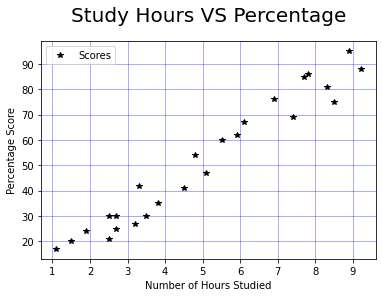

In [8]:
df.plot(x='Hours', y='Scores', style='*', color='black')
plt.grid(alpha=0.4, color='blue')
plt.title("Study Hours VS Percentage", fontsize=20, pad=20)
plt.xlabel("Number of Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

### ***We can clearly see that there is a positive relation between number of hours studied and percentage score***

In [9]:
hours=df['Hours']
scores=df['Scores']

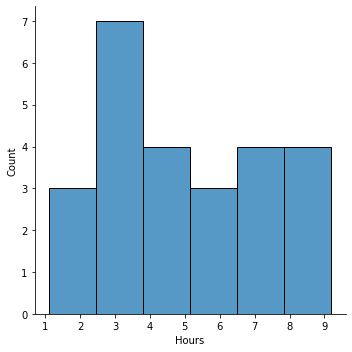

In [10]:
sns.displot(hours)

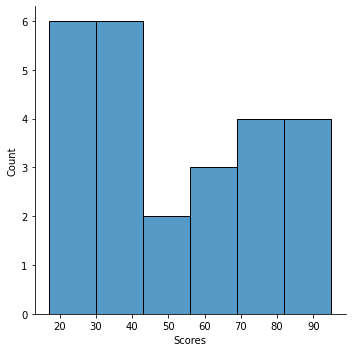

In [11]:
sns.displot(scores)

#### Data Preparation

In [12]:
#spilitting the data into inputs and outputs
X = df.iloc[:, :-1].values
y = df.iloc[:,1].values

In [13]:
# Now we use test_train_split function which we inmpoted from the library sklearn in the begining. This function splits the data into 2 subsets: Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

#### Traning And Testing of data

In [14]:
# Now we use LinearRegression() to train our data.
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Training complete")

Training complete


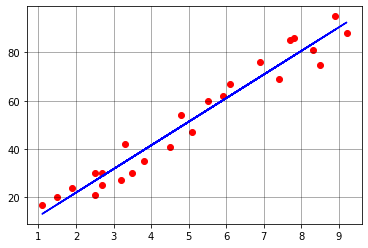

In [15]:
#ploting the Regression line 
reg_line = reg.coef_*X+reg.intercept_

#plotting test data
plt.grid(alpha=0.4, color='black')
plt.scatter(X, y, color='red')
plt.plot(X, reg_line, color='blue')

#### Predictions

In [16]:
print(X_test) # Testing Data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [17]:
#now we make some prediction based on above training
y_pred = reg.predict(X_test)
print(y_pred,"\n")
# here we find out the accuracy
print("The accuracy is: ",reg.score(X_test,y_test))

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554] 

The accuracy is:  0.9568211104435257


#### Actual vs Predicted Values

In [18]:
# now we check the difference between the actual values and the predicted values of our dataset
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<AxesSubplot:>

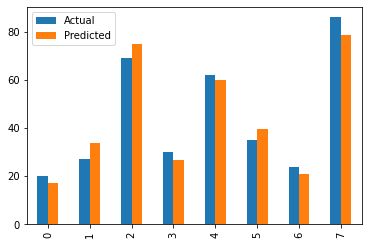

In [19]:
result.plot(kind='bar') # Visualization of our result data

#### Here we can see that there is a slight change in the values of actual and predicted one. Overall they are same..

### Ques - What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
Study_hrs = float(input("Enter the number of hours a student studies :")) #taking input for the number of hours studied
pred_score = reg.predict([[Study_hrs]])
print("The predicted score of the student = {}" .format(pred_score[0]))

Enter the number of hours a student studies :9.25
The predicted score of the student = 92.91505723477056


#### Model Evealuation

In [22]:
print("Slope of regeression line :",reg.coef_)
print("Intercept of regression line :",reg.intercept_)

Slope of regeression line : [9.78856669]
Intercept of regression line : 2.370815382341881


In [23]:
from sklearn import metrics
print("Mean Aboslute Error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Aboslute Error : 4.419727808027652
Mean Squared Error : 22.96509721270043
Root Mean Squared Error : 2.1023148689070466
